# __CIGALE Interactive Notebook__

This notebooks shows a basic and simple way to retrieve information from the <font color=blue>__SED__</font> fitting process performed with the different modules in <font color=blue>__CIGALE__</font> step by step.

It is useful to add component by component and test different ranges of parameters in the different modules and view step by step how this affects the physics behind.

__Yannick Roehlly__ provided a sample notebook in order to create this one as a template for the <font color=green>__CIGALE-MOONS__</font> project.

The models used here correspond to the HR __BC03__ and __Maraston__, 2011 models. 

<font color=red>Note</font>: <font color=blue>__CIGALE-version__</font> must be activated before the notebook is uploaded because otherwise the Jupyter notebooks will not know which functions are beeing invoked. 

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pcigale import sed
from pcigale import sed_modules as modules
from copy import deepcopy

In [2]:
%pylab inline
%config InlineBackend.figure_format='svg'
matplotlib.rcParams['figure.figsize'] = [11.,5.]

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Function defined in order to cut the spectrum in a given range

def limit_spec(spectrum):
    wave, lum = spectrum
    xmin, xmax = 100, 681 #This cut corresponds to ELODIE models
    mask = (wave >= xmin) & (wave <= xmax)
    return wave[mask], lum[mask]

# SED object is initialized

Two different SED objects are created in order to test the high-resolution BC03 and Maraston,2011 models

In [4]:
gal_1     = sed.SED()
gal_2     = sed.SED()

# SFH model

In [5]:
# SFH

mod_1 = modules.get_module('sfh2exp', tau_main=3000, tau_burst=1e4, f_burst=0.1, age=5000, burst_age=200)
mod_1.process(gal_1)

mod_2 = modules.get_module('sfh2exp', tau_main=3000, tau_burst=1e4, f_burst=0.1, age=5000, burst_age=200)
mod_2.process(gal_2)

# SSP model 

In [6]:
# SSP

# The high-resolution model of G. Bruzual and S. Charlot, 2003 is used
mod_1   = modules.get_module('bc03', imf = 0, metallicity = 0.02)
mod_1.process(gal_1)
star_emission_1 = gal_1.wavelength_grid, gal_1.fnu

# The high-resolution model of C. Maraston and G. Strömbäck, 2011 is used
mod_2   = modules.get_module('m2005', imf = 0, metallicity = 0.02)
mod_2.process(gal_2)
star_emission_2 = gal_2.wavelength_grid, gal_2.fnu

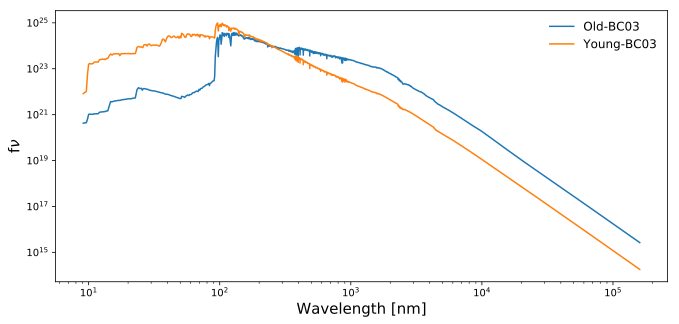

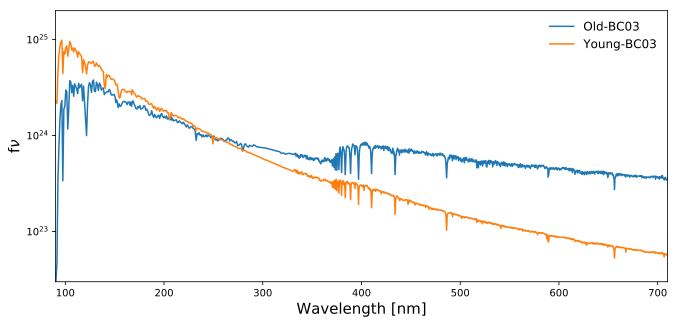

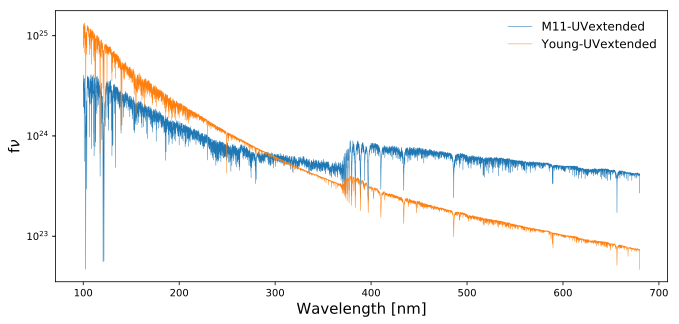

In [7]:
plt.figure()
plt.loglog(gal_1.wavelength_grid, gal_1.get_lumin_contribution('stellar.old'), label="Old-BC03")
plt.loglog(gal_1.wavelength_grid, gal_1.get_lumin_contribution('stellar.young'), label="Young-BC03")
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 1.3 , loc = 'upper right')

plt.figure()
plt.plot(gal_1.wavelength_grid, gal_1.get_lumin_contribution('stellar.old'), label="Old-BC03")
plt.plot(gal_1.wavelength_grid, gal_1.get_lumin_contribution('stellar.young'), label="Young-BC03")
plt.xlim(90, 710)
plt.ylim(3e22, 2e25)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 1.3 , loc = 'upper right')

plt.figure()
plt.plot(gal_2.wavelength_grid, gal_2.get_lumin_contribution('stellar.old'), lw = 0.5, label="M11-UVextended")
plt.plot(gal_2.wavelength_grid, gal_2.get_lumin_contribution('stellar.young'), lw = 0.5, label="Young-UVextended")
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 1.3 , loc = 'upper right')

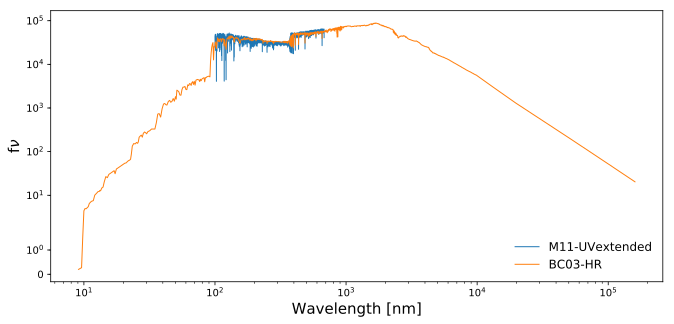

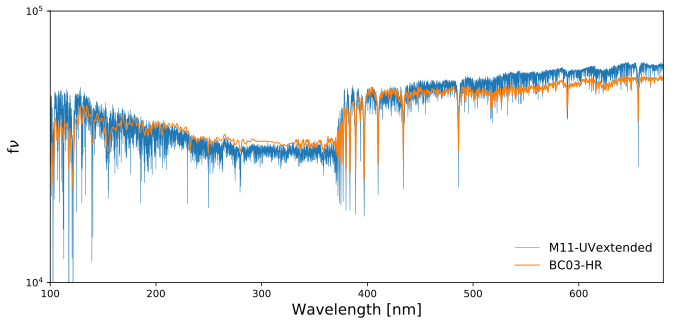

In [8]:
plt.loglog(*star_emission_2, lw = 1.0, label = 'M11-UVextended')
plt.loglog(*star_emission_1, lw = 1.0, label = 'BC03-HR')
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 1.3 , loc = 'lower right')

plt.figure()
plt.plot(*star_emission_2, lw = 0.5, label = 'M11-UVextended')
plt.plot(*star_emission_1, lw = 1.0, label = 'BC03-HR')
plt.xlim(100, 680)
plt.ylim(1e4, 1e5)
plt.yscale('symlog')
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 1.3 , loc = 'lower right')

# Nebular Emission

In [9]:
# Nebular Emission

mod_1 = modules.get_module('nebular', logU=-3.0, f_esc=0.0, f_dust=0.0, lines_width=150, emission = True)
mod_1.process(gal_1)
nebular_1 = gal_1.wavelength_grid, gal_1.fnu

# No nebular emission is computed for the M11-UVextended models because this is not implemented yet
# however, this model produced for the BC03 should not vary so much for the one expected for the 
# M11-UVextended models. So, we can just overplot the emission features onto the continuum

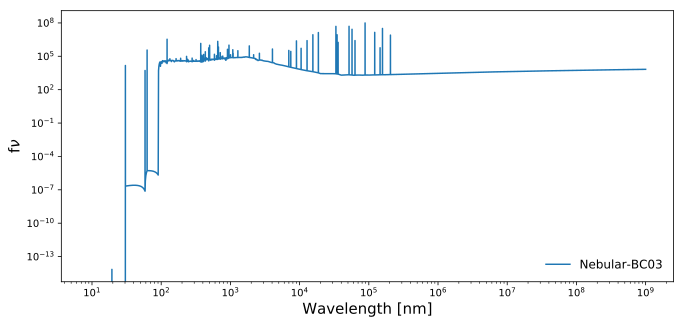

In [10]:
plt.figure()
plt.loglog(*nebular_1, label = 'Nebular-BC03')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 1.3 , loc = 'lower right')

# Dust Attenuation

In [11]:
# Dust Attenuation

mod_1 = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.2, mu = 0.3, slope_ISM = -0.7, slope_BC = -1.3)
mod_1.process(gal_1)
attenuated_star_emission_1 = gal_1.wavelength_grid, gal_1.fnu

mod_2 = modules.get_module('dustatt_modified_CF00', Av_ISM = 0.2, mu = 0.3, slope_ISM = -0.7, slope_BC = -1.3)
mod_2.process(gal_2)
attenuated_star_emission_2 = gal_2.wavelength_grid, gal_2.fnu

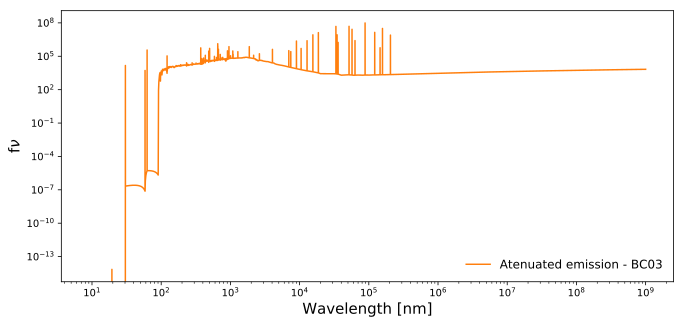

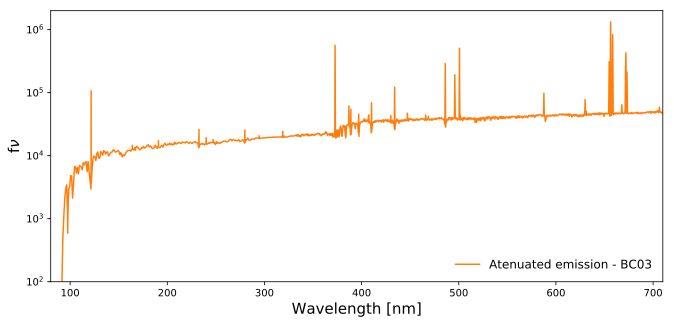

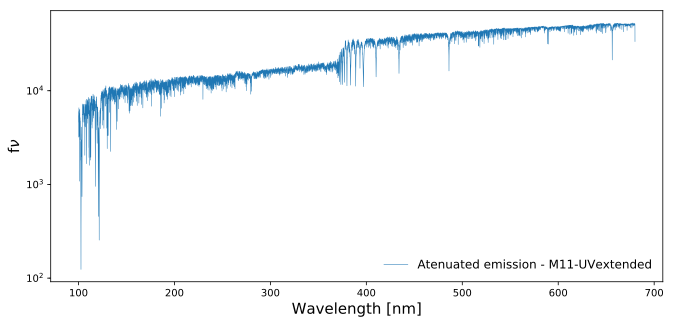

In [12]:
plt.figure()
plt.loglog(*attenuated_star_emission_1, c = 'C1', label = 'Atenuated emission - BC03')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 1.3 , loc = 'lower right')

plt.figure()
plt.plot(*attenuated_star_emission_1, c = 'C1', label = 'Atenuated emission - BC03')
plt.xlim(80, 710)
plt.ylim(1e2, 2e6)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 1.3 , loc = 'lower right')

plt.figure()
plt.plot(*attenuated_star_emission_2, lw = 0.5, label = 'Atenuated emission - M11-UVextended')
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 1.3 , loc = 'lower right')

# Dust Emission

In [13]:
# Dust Emission

mod_1 = modules.get_module('dl2014', alpha=2.5)
mod_1.process(gal_1)
attenuated_star_emission_with_ir_1   = gal_1.wavelength_grid, gal_1.fnu

mod_2 = modules.get_module('dl2014', alpha=2.5)
mod_2.process(gal_2)
attenuated_star_emission_with_ir_2   = gal_2.wavelength_grid, gal_2.fnu

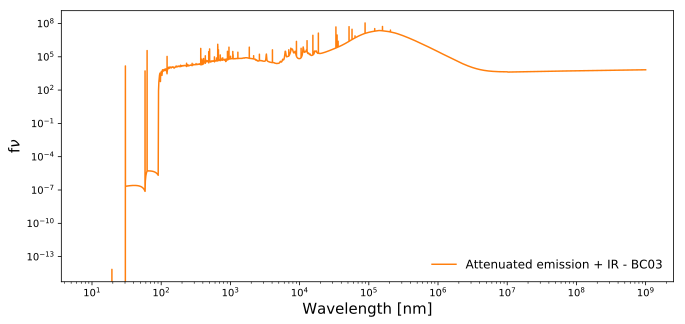

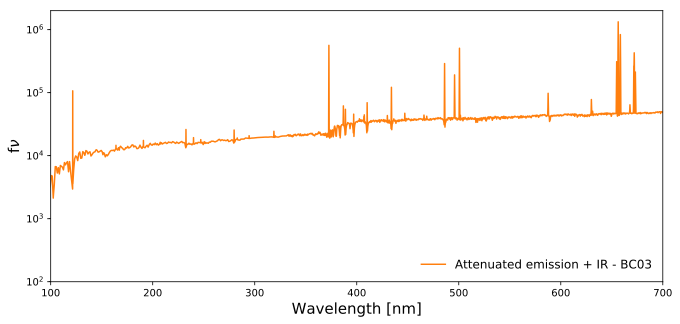

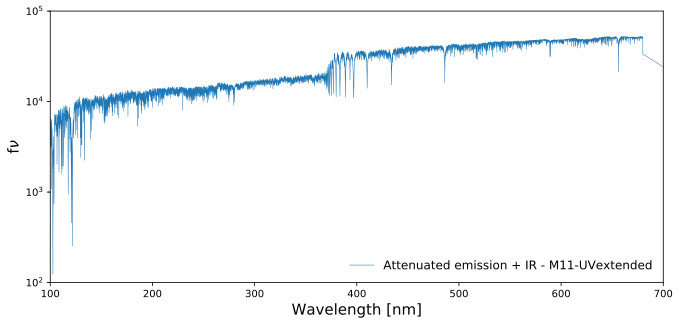

In [14]:
plt.figure()
plt.loglog(*attenuated_star_emission_with_ir_1, c = 'C1', label = 'Attenuated emission + IR - BC03')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 1.3 , loc = 'lower right')

plt.figure()
plt.plot(*attenuated_star_emission_with_ir_1, c = 'C1', label = 'Attenuated emission + IR - BC03')
plt.xlim(100, 700)
plt.ylim(1e2, 2e6)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 1.3 , loc = 'lower right')

plt.figure()
plt.plot(*attenuated_star_emission_with_ir_2, lw = 0.5, label = 'Attenuated emission + IR - M11-UVextended')
plt.xlim(100, 700)
plt.ylim(1e2, 1e5)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 12}, markerscale = 1.3 , loc = 'lower right')

# Checking the overall change  

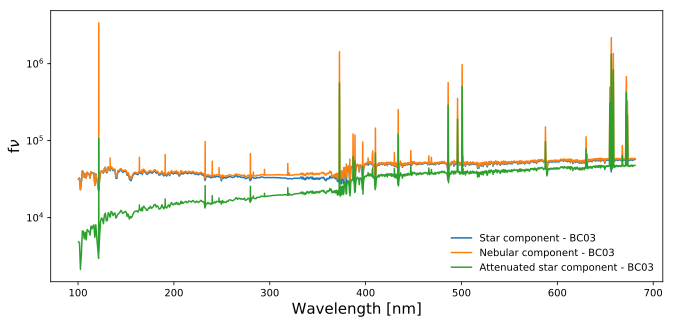

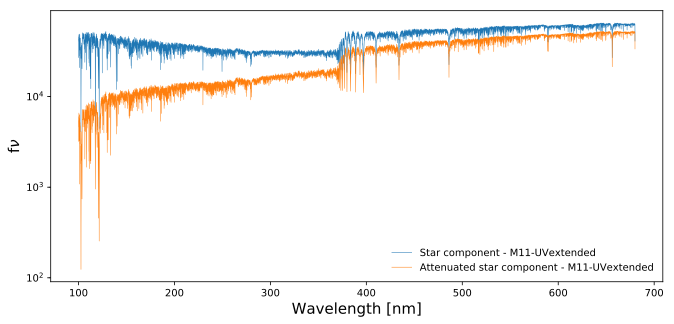

In [15]:
plt.figure()
plt.plot(*limit_spec(star_emission_1), label="Star component - BC03")
plt.plot(*limit_spec(nebular_1), label="Nebular component - BC03")
plt.plot(*limit_spec(attenuated_star_emission_1), label="Attenuated star component - BC03")
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

plt.figure()
plt.plot(*limit_spec(star_emission_2), lw = 0.5, label="Star component - M11-UVextended")
plt.plot(*limit_spec(attenuated_star_emission_2), lw = 0.5, label="Attenuated star component - M11-UVextended")
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

# BC03 nebular + M11-UVextended continuum

# Zoom-in for interesting features

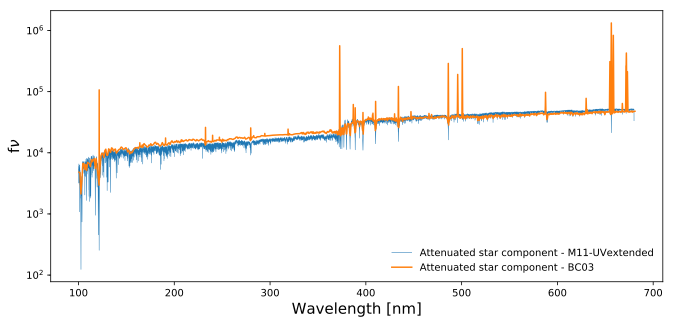

In [16]:
plt.figure()
plt.plot(*limit_spec(attenuated_star_emission_2), lw = 0.5, label="Attenuated star component - M11-UVextended")
plt.plot(*limit_spec(attenuated_star_emission_1), label="Attenuated star component - BC03")
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

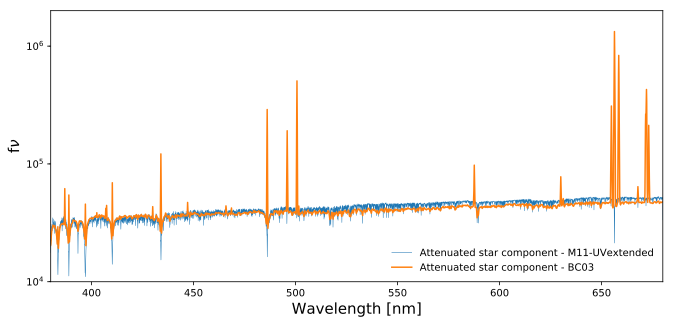

In [17]:
plt.figure()
plt.plot(*limit_spec(attenuated_star_emission_2), lw = 0.5, label="Attenuated star component - M11-UVextended")
plt.plot(*limit_spec(attenuated_star_emission_1), label="Attenuated star component - BC03")
plt.xlim(380, 680)
plt.ylim(1e4, 2e6)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

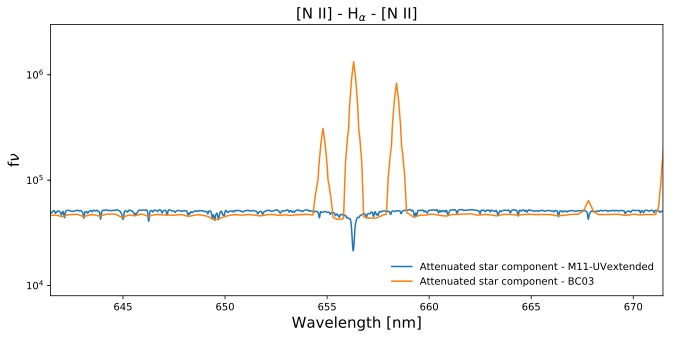

In [18]:
# H-alpha emission and absorption feature

plt.figure()
plt.plot(*limit_spec(attenuated_star_emission_2), label="Attenuated star component - M11-UVextended")
plt.plot(*limit_spec(attenuated_star_emission_1), label="Attenuated star component - BC03")
plt.xlim(656.45377-15, 656.45377+15)
plt.ylim(8e3, 3e6)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.title(r'[N II] - H$_\alpha$ - [N II]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

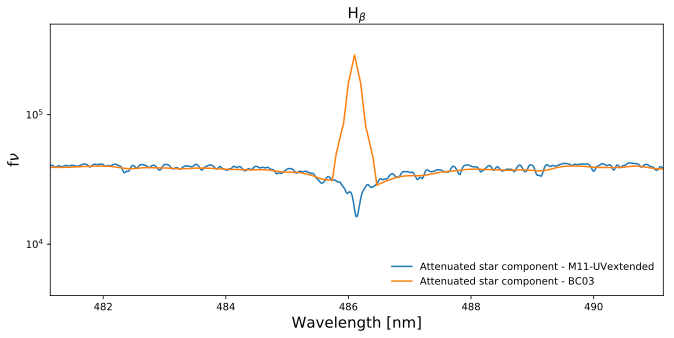

In [19]:
# H-beta emission and absorption feature

plt.figure()
plt.plot(*limit_spec(attenuated_star_emission_2), label="Attenuated star component - M11-UVextended")
plt.plot(*limit_spec(attenuated_star_emission_1), label="Attenuated star component - BC03")
plt.xlim(486.13615-5, 486.13615+5)
plt.ylim(4e3, 5e5)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.title(r'H$_\beta$', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

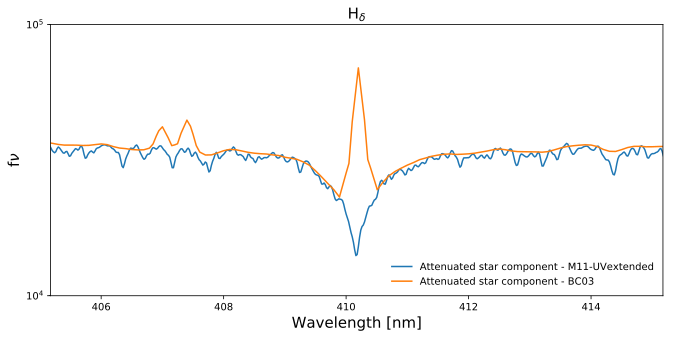

In [20]:
# H-delta emission and absorption feature

plt.figure()
plt.plot(*limit_spec(attenuated_star_emission_2), label="Attenuated star component - M11-UVextended")
plt.plot(*limit_spec(attenuated_star_emission_1), label="Attenuated star component - BC03")
plt.xlim(410.174-5, 410.174+5)
plt.ylim(1e4, 1e5)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.title(r'H$_\delta$', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

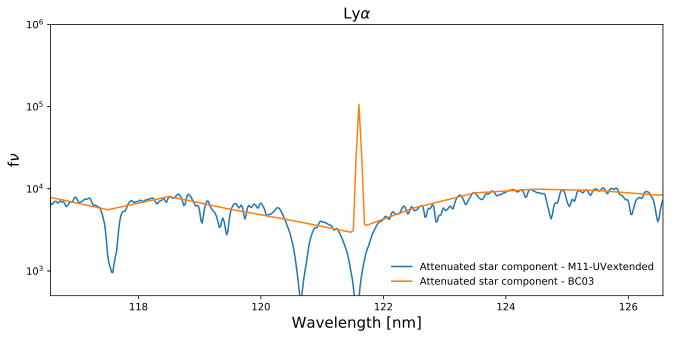

In [21]:
# Lyman-alpha emission feature

plt.figure()
plt.plot(*limit_spec(attenuated_star_emission_2), label="Attenuated star component - M11-UVextended")
plt.plot(*limit_spec(attenuated_star_emission_1), label="Attenuated star component - BC03")
plt.xlim(121.565-5, 121.565+5)
plt.ylim(5e2, 1e6)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.title(r'Ly$\alpha$', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

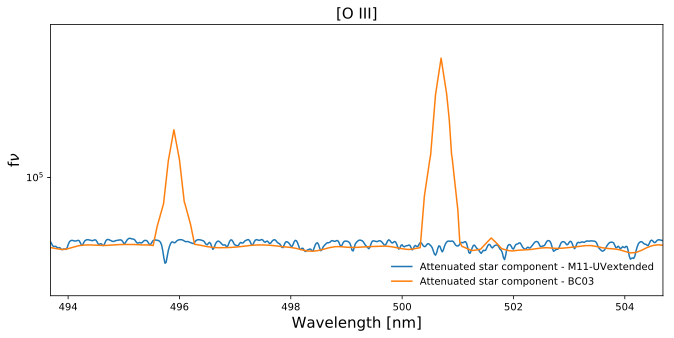

In [22]:
# [O III] emission feature

plt.figure()
plt.plot(*limit_spec(attenuated_star_emission_2), label="Attenuated star component - M11-UVextended")
plt.plot(*limit_spec(attenuated_star_emission_1), label="Attenuated star component - BC03")
plt.xlim(500.685-7, 500.685+4)
plt.ylim(2e4, 8e5)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.title(r'[O III]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

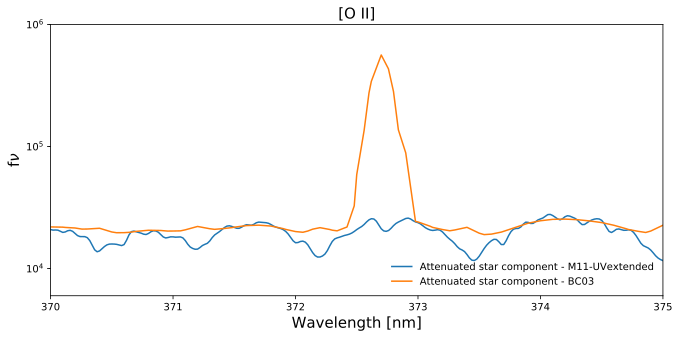

In [23]:
# [O II] emission feature

plt.figure()
plt.plot(*limit_spec(attenuated_star_emission_2), label="Attenuated star component - M11-UVextended")
plt.plot(*limit_spec(attenuated_star_emission_1), label="Attenuated star component - BC03")
plt.xlim(370, 375)
plt.ylim(6e3, 1e6)
plt.yscale('symlog')
plt.xlabel('Wavelength [nm]', fontsize = 15)
plt.title(r'[O II]', fontsize = 15)
plt.ylabel(r'f$\nu$', fontsize = 15)
plt.legend(frameon = False, prop = {'size': 10}, markerscale = 1.3 , loc = 'lower right')

# Redshifting the computed SED

In [24]:
# Copy of the SED objects above

gal_1_redshifted = deepcopy(gal_1)
gal_2_redshifted = deepcopy(gal_2)

In [25]:
# Redshifting

mod_1_red = modules.get_module('redshifting', redshift=1.5)
mod_1_red.process(gal_1_redshifted)
redshifted_1 = gal_1_redshifted.wavelength_grid, gal_1_redshifted.fnu

mod_2_red = modules.get_module('redshifting', redshift=1.5)
mod_2_red.process(gal_2_redshifted)
redshifted_2 = gal_2_redshifted.wavelength_grid, gal_2_redshifted.fnu

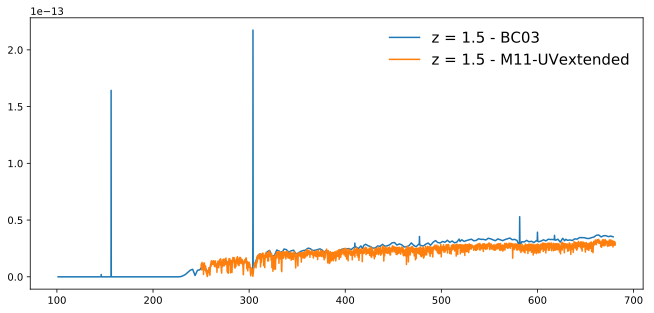

In [26]:
plt.plot(*limit_spec(redshifted_1), label="z = 1.5 - BC03")
plt.plot(*limit_spec(redshifted_2), label="z = 1.5 - M11-UVextended")
# plt.plot(*limit_spec(attenuated_star_emission_1), color="r", ls=":", label="z = 0")
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 1.3 , loc = 'upper right')